In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns', None)

In [9]:
infections_df = pd.read_csv("Data/Cleaned/infections_cleaned.csv")
deaths_df = pd.read_csv("Data/Cleaned/deaths_cleaned2.csv")
cia_df = pd.read_csv("Data/Cleaned/cia_simplified.csv")

In [4]:
infections_df.head()

,Date,Austria,Italy,Portugal,Greece,Taiwan*,Indonesia,India,Mexico,Thailand,Iran
0,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1/24/20,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
2,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1/26/20,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0
4,1/27/20,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [5]:
deaths_df.head()

,Date,Austria,Italy,Portugal,Greece,Taiwan*,Indonesia,India,Mexico,Thailand,Iran
0,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/27/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
cia_df.head()

,country,current_health_expenditure_2019,physicians_density_per_1000_2020_to_2018,Hospital_bed_density_per_1000_2018_to_2017,geography_area_total_sq_km,real_GDP_per _capita_3year_average_2020_2018,GDP_official_exchange_rate_Billion,Population,Real_GDP_purchasing_power_parity_3year_ave
0,Austria,0.104,5.29,7.3,83871.0,54333.0,445.0,8.913088e+06,483.0
1,Greece,0.078,6.31,4.2,131957.0,28733.0,210.0,1.053387e+07,308.0
2,India,0.030,0.74,0.5,3287263.0,6433.0,2836.0,1.389637e+09,8812.0
3,Indonesia,0.029,0.62,1.0,1904569.0,11533.0,1120.0,2.773292e+08,3175.0
4,Iran,0.067,1.58,1.6,1648195.0,12767.0,581.0,8.675830e+07,1033.0


In [11]:
cia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   country                                       10 non-null     object 
 1   current_health_expenditure_2019               9 non-null      float64
 2   physicians_density_per_1000_2020_to_2018      9 non-null      float64
 3   Hospital_bed_density_per_1000_2018_to_2017    8 non-null      float64
 4   geography_area_total_sq_km                    10 non-null     float64
 5   real_GDP_per _capita_3year_average_2020_2018  10 non-null     float64
 6   GDP_official_exchange_rate_Billion            10 non-null     float64
 7   Population                                    10 non-null     float64
 8   Real_GDP_purchasing_power_parity_3year_ave    10 non-null     float64
dtypes: float64(8), object(1)
memory usage: 848.0+ bytes


In [12]:
cia_df["pop_density"] = (cia_df["Population"] / cia_df["geography_area_total_sq_km"])
cia_df

,country,current_health_expenditure_2019,physicians_density_per_1000_2020_to_2018,Hospital_bed_density_per_1000_2018_to_2017,geography_area_total_sq_km,real_GDP_per _capita_3year_average_2020_2018,GDP_official_exchange_rate_Billion,Population,Real_GDP_purchasing_power_parity_3year_ave,pop_density
0,Austria,0.104,5.29,7.3,83871.0,54333.0,445.0,8.913088e+06,483.0,106.271393
1,Greece,0.078,6.31,4.2,131957.0,28733.0,210.0,1.053387e+07,308.0,79.828058
2,India,0.030,0.74,0.5,3287263.0,6433.0,2836.0,1.389637e+09,8812.0,422.733881
3,Indonesia,0.029,0.62,1.0,1904569.0,11533.0,1120.0,2.773292e+08,3175.0,145.612557
4,Iran,0.067,1.58,1.6,1648195.0,12767.0,581.0,8.675830e+07,1033.0,52.638373
5,Italy,0.087,3.95,3.1,301340.0,41267.0,2003.0,6.109555e+07,2470.0,202.746237
6,Mexico,0.054,2.43,1.0,1964375.0,19167.0,1270.0,1.291510e+08,2445.0,65.746597
7,Portugal,0.095,5.48,3.5,92090.0,33700.0,238.0,1.024208e+07,347.0,111.218167
8,Taiwan,NaN,NaN,NaN,35980.0,32956.0,611.0,2.358071e+07,1128.0,655.383880
9,Thailand,0.038,0.95,NaN,513120.0,17967.0,544.0,6.964812e+07,1259.0,135.734559


In [30]:
deaths_df2 = pd.read_csv("Data/Cleaned/deaths_totals.csv")
deaths_df3 = deaths_df2.dropna()
deaths_df3

,country,total_deaths
0,Austria,21037
1,Italy,179436
2,Portugal,25290
3,Greece,33750
4,Taiwan,13198
5,Indonesia,158829
6,India,530500
7,Mexico,330424
8,Thailand,32995
9,Iran,144596


In [29]:
infect_totals3 = pd.read_csv("Data/Cleaned/infections_totals.csv")
infect_totals4 = infect_totals3.dropna()
infect_totals4

,country,total_infections
0,Austria,5466250
1,Italy,23642011
2,Portugal,5525459
3,Greece,5188890
4,Taiwan,7887537
5,Indonesia,6521292
6,India,44660579
7,Mexico,7113658
8,Thailand,4695203
9,Iran,7558142


In [31]:
country_stats = cia_df.drop(columns=["current_health_expenditure_2019", "physicians_density_per_1000_2020_to_2018", "Hospital_bed_density_per_1000_2018_to_2017", "real_GDP_per _capita_3year_average_2020_2018", "GDP_official_exchange_rate_Billion", "Real_GDP_purchasing_power_parity_3year_ave"])
country_stats

,country,geography_area_total_sq_km,Population,pop_density
0,Austria,83871.0,8.913088e+06,106.271393
1,Greece,131957.0,1.053387e+07,79.828058
2,India,3287263.0,1.389637e+09,422.733881
3,Indonesia,1904569.0,2.773292e+08,145.612557
4,Iran,1648195.0,8.675830e+07,52.638373
5,Italy,301340.0,6.109555e+07,202.746237
6,Mexico,1964375.0,1.291510e+08,65.746597
7,Portugal,92090.0,1.024208e+07,111.218167
8,Taiwan,35980.0,2.358071e+07,655.383880
9,Thailand,513120.0,6.964812e+07,135.734559


In [32]:
covid_both = pd.merge(deaths_df3, infect_totals4, on="country")
covid_both

,country,total_deaths,total_infections
0,Austria,21037,5466250
1,Italy,179436,23642011
2,Portugal,25290,5525459
3,Greece,33750,5188890
4,Taiwan,13198,7887537
5,Indonesia,158829,6521292
6,India,530500,44660579
7,Mexico,330424,7113658
8,Thailand,32995,4695203
9,Iran,144596,7558142


In [33]:
all_totals = pd.merge(covid_both, country_stats, on="country")
all_totals

,country,total_deaths,total_infections,geography_area_total_sq_km,Population,pop_density
0,Austria,21037,5466250,83871.0,8.913088e+06,106.271393
1,Italy,179436,23642011,301340.0,6.109555e+07,202.746237
2,Portugal,25290,5525459,92090.0,1.024208e+07,111.218167
3,Greece,33750,5188890,131957.0,1.053387e+07,79.828058
4,Taiwan,13198,7887537,35980.0,2.358071e+07,655.383880
5,Indonesia,158829,6521292,1904569.0,2.773292e+08,145.612557
6,India,530500,44660579,3287263.0,1.389637e+09,422.733881
7,Mexico,330424,7113658,1964375.0,1.291510e+08,65.746597
8,Thailand,32995,4695203,513120.0,6.964812e+07,135.734559
9,Iran,144596,7558142,1648195.0,8.675830e+07,52.638373


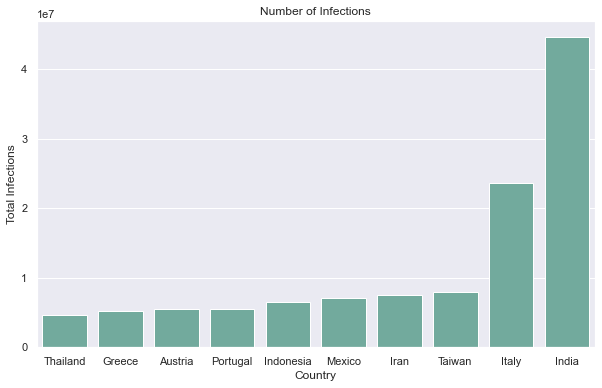

In [44]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
sns.barplot(data=all_totals.sort_values(["total_infections"], ascending=True), x="country", y="total_infections", color='#69b3a2')
plt.title("Number of Infections")
plt.xlabel('Country')
plt.ylabel('Total Infections')
plt.show()

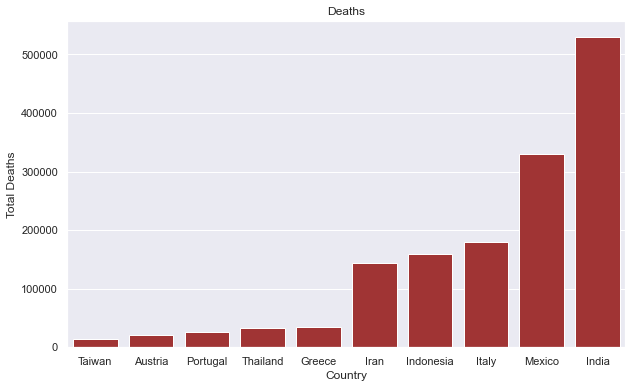

In [43]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
sns.barplot(data=all_totals.sort_values(["total_deaths"], ascending=True), x="country", y="total_deaths", color='firebrick')
plt.title("Deaths")
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.show()